# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from io import StringIO 
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report, classification_report
from sklearn.neighbors import KNeighborsClassifier
seed=999

# Loading Data

In [2]:
df = pd.DataFrame(load_breast_cancer()['data'], columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
X = df.iloc[:,:-1]       # Features
y = df.iloc[:,-1]        # Target variable

# Splitting Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Building Decision Tree Model
   **CRITERION=gini**

In [5]:
classifier = DecisionTreeClassifier(criterion="gini", max_depth=3)
classifier = classifier.fit(X_train,y_train)

# Evaluating Model

In [6]:
y_train_pred = classifier.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.9748743718592965


In [7]:
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9122807017543859


# Visualizing Decision Trees

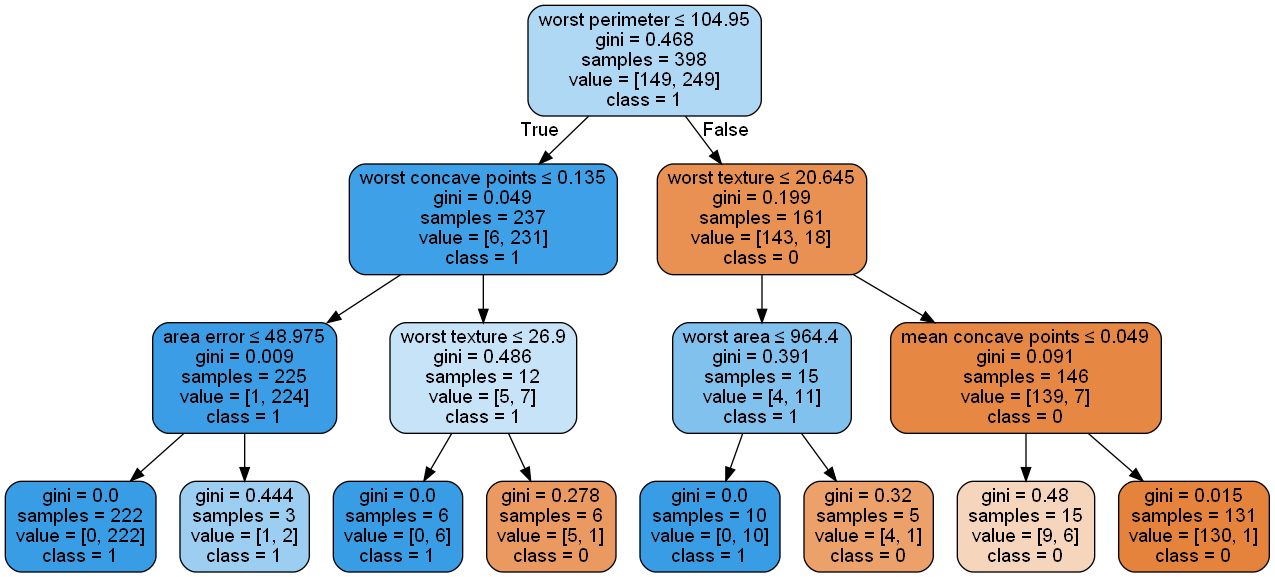

In [8]:


dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=load_breast_cancer()['feature_names'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breast_cancer.png')
Image(graph.create_png())

# Building Decision Tree Model
**CRITERION=entropy**

In [9]:
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
classifier = classifier.fit(X_train,y_train)

# Evaluating Model

In [10]:
y_train_pred = classifier.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.9698492462311558


In [11]:
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8830409356725146


# Visualizing Decision Trees

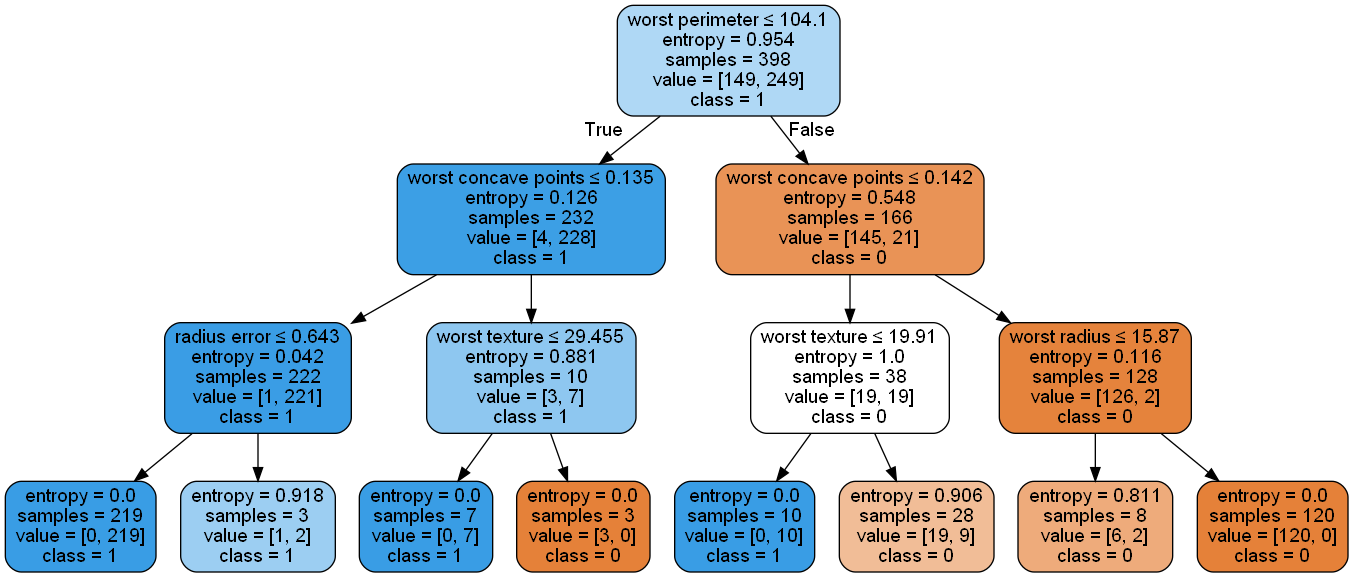

In [12]:

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  filled=True, rounded=True,special_characters=True, feature_names = load_breast_cancer()['feature_names'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Breast_Cancer1.png')
Image(graph.create_png())

# RandomForestClassifier

# Splitting Data

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .33, stratify = y, random_state = seed)

# RandomForestClassifier with class_weight

In [14]:
positive_weight = sum(ytrain == 0) / sum(ytrain == 1)
estimator = RandomForestClassifier(random_state=0, class_weight = {0 : 1, 1 : positive_weight}, warm_start = True)

In [15]:
rf_tuned_parameters = {"max_depth": [10,20,50,100], 'n_estimators': [50], 'min_samples_leaf': [10,20,50]}

In [16]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
print(cv_grid.fit(Xtrain, ytrain))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 2/5] END ma

In [17]:
print(cv_grid.cv_results_)

{'mean_fit_time': array([0.06460872, 0.0688417 , 0.0499907 , 0.06404066, 0.06146703,
       0.0510911 , 0.07414885, 0.06488023, 0.05948486, 0.06852045,
       0.0654016 , 0.06064653]), 'std_fit_time': array([0.00822628, 0.00357292, 0.0060834 , 0.00576503, 0.00885089,
       0.00548676, 0.00787943, 0.00935107, 0.00898027, 0.00886513,
       0.00531874, 0.0052621 ]), 'mean_score_time': array([0.00597153, 0.00821743, 0.00638332, 0.0055747 , 0.00538464,
       0.00518813, 0.00538192, 0.00667682, 0.00577831, 0.00696435,
       0.00867348, 0.00742407]), 'std_score_time': array([0.0015305 , 0.00320888, 0.00184992, 0.00048306, 0.00049246,
       0.00039602, 0.00048844, 0.00219424, 0.00074535, 0.00165322,
       0.00205805, 0.00337419]), 'param_max_depth': masked_array(data=[10, 10, 10, 20, 20, 20, 50, 50, 50, 100, 100, 100],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object)

# Best Parameters

In [18]:
best_parameters = cv_grid.best_estimator_.get_params()
print(best_parameters)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 0.5941422594142259}, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': True}


In [19]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	max_depth: 10
	min_samples_leaf: 10
	n_estimators: 50


# Evaluating Model

In [20]:
pred_test = cv_grid.predict(Xtest)
print(recall_score(ytest, pred_test))     
print(precision_score(ytest, pred_test))  
print(roc_auc_score(ytest, pred_test))   
print("\n confustion matrix on validation data: \n" + str(confusion_matrix(ytest, pred_test)))

0.9491525423728814
0.9739130434782609
0.9531476997578694

 confustion matrix on validation data: 
[[ 67   3]
 [  6 112]]


# Self-defined Score and GridSearchCV of hyperparameter

In [21]:
def scoring(ground_truth, predictions):
    '''
    based on results above about the average loss from false positive and false negative predictions.
    '''
    cmatrix = confusion_matrix(ground_truth, predictions)
    fp = cmatrix[0, 1]
    fn = cmatrix[1, 0]
    return  fn * 122 + fp * 1.76
wt_loss_score = make_scorer(scoring, greater_is_better = False)
estimator = RandomForestClassifier(random_state=0, warm_start = True)
rf_tuned_parameters = {"max_depth": [10,20,50,100], 'n_estimators': [50], 'min_samples_leaf': [10,20,50]}
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = wt_loss_score, verbose = 5)
print(cv_grid.fit(Xtrain, ytrain))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 2/5] END ma

In [22]:
print(cv_grid.best_params_)

{'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 50}


# Best Parameters

In [23]:
best_parameters = cv_grid.best_estimator_.get_params()
print(best_parameters)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': True}


In [24]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	max_depth: 10
	min_samples_leaf: 10
	n_estimators: 50


# Evaluating Model

In [25]:
pred_test = cv_grid.predict(Xtest)
print(recall_score(ytest, pred_test))     # 0.84
print(precision_score(ytest, pred_test))  # 0.84
print(roc_auc_score(ytest, pred_test))    # 0.92
print("\n confustion matrix on validation data: \n" + str(confusion_matrix(ytest, pred_test)))

0.9576271186440678
0.9741379310344828
0.9573849878934626

 confustion matrix on validation data: 
[[ 67   3]
 [  5 113]]


# Gradient Boosting Classifier

In [26]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(Xtrain,ytrain)
estimator = GradientBoostingClassifier()
rf_tuned_parameters = {"max_depth": [10, 20, 50, 100], 'n_estimators': [50], 'min_samples_leaf': [10, 20, 50], 'learning_rate': [0.1, 0.01]}

In [27]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(Xtrain, ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=20, n_estimators=50; total time=   0.1s
[CV 5/5] EN

[CV 5/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=10, n_estimators=50; total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50],
                         'n_estimators': [50]},
             scoring='roc_auc', verbose=5)

# Best Parameters and classification reports

In [28]:
best_parameters = cv_grid.best_estimator_.get_params()
print(best_parameters)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 100, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [29]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	learning_rate: 0.1
	max_depth: 100
	min_samples_leaf: 20
	n_estimators: 50


In [30]:
print(classification_report(ytest,gradient_booster.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.97      0.99      0.98       118

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [31]:
print(classification_report(ytest,cv_grid.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        70
           1       0.98      0.97      0.97       118

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



# Evaluating and visualizing Model

Confusion Matrix : 
 [[ 68   2]
 [  4 114]]
Accuracy Score is 0.9681
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        70
           1       0.98      0.97      0.97       118

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

AUC-ROC: 0.9687651331719128
LOGLOSS Value is 1.1023


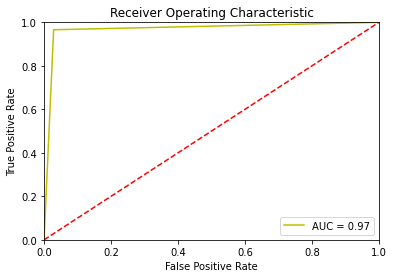

In [32]:
ypred = cv_grid.predict(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(ytest, ypred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(ytest, ypred)))
print ('Classification Report : \n', classification_report(ytest, ypred))
print('AUC-ROC:',roc_auc_score(ytest, ypred))
print('LOGLOSS Value is %.4f' % log_loss(ytest, ypred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN Classifier

# Generating Model for K=5

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model Evaluation for k=5

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9298245614035088
